In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import watermark

sns.set_theme()

# Scatterplot: Arable land vs. livestock by farm type

In [3]:
# load raw data
df = pd.read_csv('../data/raw/rawdata_new.csv')

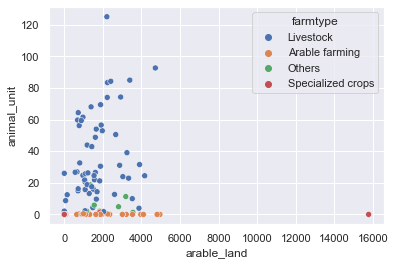

In [4]:
sns.scatterplot(data=df, x='arable_land', y='animal_unit', hue='farmtype')
plt.savefig('../figures/plot_land_vs_livestock.png', dpi=300)

In [5]:
chart_land_vs_livestock = alt.Chart(df).mark_circle().encode(
    x=alt.X('arable_land', axis=alt.Axis(title='Arable land (hectares)')),
    y=alt.Y('animal_unit', axis=alt.Axis(title='Livestock (animal units)')),
    color=alt.Color('farmtype', legend=alt.Legend(title='Farm type'), sort=['Arable farming', 'Livestock', 'Specialized crops', 'Other', 'null'])
)
chart_land_vs_livestock

alt.Chart(...)

# Barplot: Implemented response by Mitigation category and measure

In [6]:
# define list of mitigation implemented columns
implemented_columns = ['legum', 'conc', 'add', 'lact', 'breed', 'covman', 'comp', 'drag', 'cov', 'plough', 'solar', 'biog', 'ecodr']

# convert implemented mitigations from wide to long format
implemented_df = pd.melt(df, id_vars='id', value_vars=implemented_columns, var_name='mitigation', value_name='implemented')

# create farm type and animal unit dataframe
farm_df = df[['id', 'farmtype']]
# set id as index
farm_df.set_index('id', inplace=True)

# join dataframes together
mitigation_df = implemented_df.copy()
mitigation_df = mitigation_df.join(farm_df, on='id')
# reset index for altair
mitigation_df.reset_index(inplace=True)

alt.Chart(mitigation_df).mark_bar().encode(
    x='count(implemented)',
    y=alt.Y('mitigation', sort=implemented_columns),
    color='implemented:N',
    column='farmtype'
)

alt.Chart(...)

# Version details

In [7]:
import watermark
%load_ext watermark
%watermark

Last updated: 2021-12-15T16:17:06.881187-08:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [8]:
%watermark -iv

matplotlib: 3.3.2
sys       : 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
watermark : 2.2.0
pandas    : 1.2.0
altair    : 4.1.0
seaborn   : 0.11.1

